
# Blood Pressure and Flow in the Human Vasculature

This exercise models blood pressure-related flow in arteries and veins using Poiseuille's law. You will explore pressure changes across different vascular segments and identify physiologically normal and abnormal thresholds.

## Objectives
- Understand pressure distribution across the vascular system
- Apply Poiseuille's law to model blood flow
- Identify physiological thresholds for blood pressure
- Answer descriptive questions based on plots and simulations


# Initial Questions
1. How is bloodflow in any given vessel defined? And what would the average resistance in a vessel be, if the pressure dropped 95 mmHg, if the cardiac output (CO) was 5 L/min? Remember to always write units.

**Answer**:
Bloodflow is defined as the the pressure drop divided by the resistance:
$$ Q = \frac{\Delta P}{R}$$
So for the scenario defined:
$$R = \frac{\Delta P}{CO}=\frac{95 mmHg}{5 L/min} = 19 \frac{mmHg \times min}{L}$$

2. Define Vascular resistance. How, in general, does it depend on vessel caliber?

**Answer**: 
Vascular resistance is the resistance against flow in a vessel. 
The two factors determining resistance is the viscosity of the fluid (the blood) and the diameter of the vessel. 
The larger the diameter, the smaller the resistance. In fact, the resistance is inversely proportional to diameter to the fourth power:
$$R \propto \frac{1}{r^4} $$
So even a small change in diameter gives large changes in resistance.

3. How is pulmonary circulation distinct from systemic circulation?

**Answer**: 
There are mainly two factors that make the pulmonary circulation distinct from the systemic circulation. 
One is that the pressure in the pulmonary circulation is much lower (25 – 5 mmHg) than in the systemic circulation (120 – 5 mmHg). 
Next, and rather obvious, arteries in the pulmonary circulation carry deoxygenated blood, whereas arteries in the systemic circulation carry oxygen-rich blood. 
Remember, that arteries have thicker tunica media and tunica externa than veins, due to the higher pressures that are exerted on them.

4. Define compliance. Why is compliance higher in veins than in arteries?

**Answer**: 
Compliance is defined as:
$$C=\frac{\Delta V}{\Delta P}$$

That is, how much the volume changes per unit pressure change. 
So, a balloon is very compliant, while a metal gas tank has virtually no compliance. 
A danish term for compliance could be “eftergivenhed”. 
The veins are very compliant and can store blood with practically no increase in pressure. 
Also, the elastic arteries, primarily aorta, have relatively high compliance which helps smooth blood flow (the Windkessel effect).

5. From the hematocrit and number of red blood cells (obtained by hemacytometry) Calculate MCV.

**Answer**: 
Hemacrytometry is the counting of RBC.So the amount of RBC (n [Cells/volume whole blood]) for a specified volume V.
And HTC is the fraction of packed RBC volume to total volume.
Calculate the MVC is therefore the RBC volume of the specified volume. Or: 
$$ MVC = \frac{V \times HTC}{n}$$

6. Describe the control of erythropoiesis

**Answer**: 
See figure 5.2.7 in the book

# Helper functions

In [ ]:
import numpy as np


# Poiseuille's Law: Q = (π * ΔP * r^4) / (8 * η * L)
def poiseuille_flow(dP, radius, viscosity, length):
    return (np.pi * mmHg2Pa(dP) * radius**4) / (8 * viscosity * 1e-3 * length)


def mmHg2Pa(mmHg):
    return mmHg * 133.322


# Exercise - Flow versus radius

Consider if we wish to describe the flow depending on the vessel diameter

In [ ]:
import matplotlib.pyplot as plt


conditions = {
    "Normal": {"viscosity": 4, "length": 0.3, "dP": 40},
}

diameter = np.linspace(1e-3, 30e-3, 100)  # Radii from 1mm to 30mm
plt.figure(figsize=(8,5))
for scenario, params in conditions.items():
    # Parameters
    viscosity = params["viscosity"]  # Pa.s (typical blood viscosity)
    length = params["length"]     # m (segment length)
    dP = params["dP"]    #

    # Calculate flow
    Q = poiseuille_flow(dP, diameter / 2, viscosity, length)

    # Plot
    plt.plot(diameter * 1e3, Q*1e3, label=scenario)
    plt.xlabel('Artery diameter (mm)')
    plt.ylabel('Flow Rate ($\\frac{L}{min}$)')
    plt.title("Poiseuille's Law: Flow vs Vessel Diameter")
    plt.grid(True)

plt.legend()
plt.show()


# Exercise - Plot the velocity in the aorta


## Questions and Answers

1. **What is the pressure drop from the aorta to the capillaries?**  
   The pressure drops from 120 mmHg in the aorta to 30 mmHg in the capillaries, resulting in a drop of **90 mmHg**.

2. **Which segment shows the greatest resistance to flow?**  
   Arterioles show the greatest resistance due to their small radius and muscular walls, which regulate blood flow.

3. **How does vessel radius affect flow rate according to Poiseuille's law?**  
   Flow rate is proportional to the **fourth power of the radius**. Small changes in radius lead to large changes in flow.

4. **At what pressure levels would you consider the values physiologically abnormal?**  
   Any pressure outside the defined thresholds for each segment (e.g., aorta < 90 or > 130 mmHg) is considered abnormal.

5. **How does the pressure in the vena cava compare to the aorta?**  
   The pressure in the vena cava (5 mmHg) is significantly lower than in the aorta (120 mmHg), reflecting the drop across the systemic circulation.


# Blood Vessels

For every vessel in the list below, answer the following:
- Diameter, and wall thickness
- Wall 
- Pressure drop in the blood vessel

| Blood Vessel | Diameter | Wall Thickness | Pressure Drop | General Location |
|---------------|-----------|----------------|----------------|------------------|
| Aorta | | | | |
| Pulmonary artery | | | | |
| Pulmonary veins | | | | |
| Superior vena cava | | | | |
| Inferior vena cava | | | | |
| Coronary arteries | | | | |
| Carotid arteries | | | | |
| Subclavian arteries | | | | |
| Brachial artery | | | | |
| Radial artery | | | | |
| Subclavian veins | | | | |
| Femoral artery | | | | |
| Brachial vein | | | | |
| Radial vein | | | | |
| Femoral vein | | | | |
| Capillaries | | | | |
| Arterioles | | | | |


# Exercise: Pressure

In Section 5.9, there is alot of information regarding pressure. I suggest you start by getting familiar with this chapter for theis exercise, if you are not already.

To begin with we have a set of data. Which is stored inside of the file `pressure_data.csv`, and displayed below:

In [3]:
import pandas as pd
from pathlib import Path
df0001 = pd.read_csv(Path("files/autonomic-aging-cardiovascular/0001.csv"), delimiter=",")
df0002 = pd.read_csv(Path("files/autonomic-aging-cardiovascular/0002.csv"), delimiter=",")
# Show data df0001
df0001

,time_s,ECG1,ECG2,NIBP
0,0.00,0.186327,-0.054055,113.253152
1,0.01,0.197330,-0.028579,113.084352
2,0.02,0.200241,-0.053481,112.904868
3,0.03,0.193263,-0.037275,112.692265
4,0.04,0.224603,-0.041327,112.423040
...,...,...,...,...
995,9.95,0.377149,-0.052908,110.212612
996,9.96,0.386996,-0.040161,109.876080
997,9.97,0.371369,-0.054648,109.684845
998,9.98,0.376592,-0.039587,109.449807


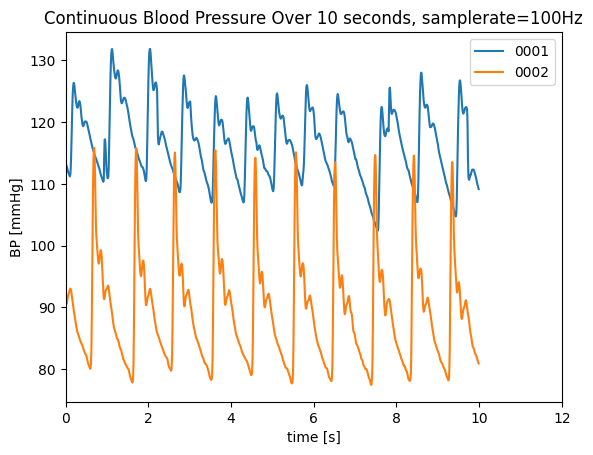

In [6]:
import matplotlib.pyplot as plt
# Plot Continuous Blood Pressures from two subjects
plt.plot(df0001["time_s"], df0001["NIBP"], label="0001")
plt.plot(df0002["time_s"], df0002["NIBP"], label="0002")
plt.ylabel("BP [mmHg]")
plt.xlabel("time [s]")
plt.legend(loc='upper right')
plt.xlim([0,12])
plt.title("Continuous Blood Pressure Over 10 seconds, samplerate=100Hz")
plt.show()

## Beregn det gennemsnitlige Arterielle blodtryk

I plottet ovenover kan du se 10 sekunders optagelse af blodtryk fra 2 patienter.
Men det leder op til hvad det gennemsnitlige blodtryk er for disse 2 patienter. 
Du skal du beregne det gennemsnitlige arterielle blodtryk for hvert hjerteslag fra de 2 patienter ved hjælp af følgende formel:

$$ P_A = \frac{\int_{t_1}^{t_2} P(t) dt}{t_2-t_1} $$

*Hint: se Figure 5.9.3 og Formel 5.9.8 i bogen.*


In [17]:
import statistics
fs = 100 # samplingrate
bp0001: list[float] = df0001["NIBP"].to_list()
bp0002: list[float] = df0002["NIBP"].to_list()


# Find RR:
def find_peaks(X):
    peaks = []
    record = [0,0]
    thr = statistics.mean(X) # A threshold to decide that we should find highest peak
    for i,x in enumerate(X):
        if x>thr:
            if x>record[0]:
                record = [x,i]
        else:
            if record[0]>0:
                peaks.append(record[1])
            record = [0,0]
    return peaks



# Beregn det gennemsnitlige
peaks_0001 = find_peaks(bp0001)
peaks_0001

[19, 95, 112, 204, 234, 286, 363, 440, 511, 583, 658, 784, 860, 954]